# Session 6: An interactive Fourier series square wave (Joshua Giblin-Burnham)

This notebook gives a visual representation of the fourier series sum of a square wave, the number of terms in the series can be varied to see the development of the series as a closer approximation. 

#### Fourier series
Fourier's theorem says that any periodic function can be decomposed into the sum of sine and cosine functions. 


The fouries series for a square wave is given as:

$$f_\text{square}(x) = \frac{4}{\pi} \sum_{n = 1, 3, 5, \ldots}^{\infty} \frac{1}{n} \sin\left(\frac{n \pi x}{L}\right)$$

where the period of the function is $[-L,L]$.

The Fourier series is a summation of sine waves, as we use a slider this canges the number of sine waves summed to produce the plot. This visualises how the ve is built up from sine waves of different frequencies and amplitudes. 


'taken from Session 6 notebook'

In [8]:
# Import libraries for notebook:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from IPython.display import display
plt.rcParams['figure.figsize'] = 20, 12


In [9]:
# Set up initial data

L = np.pi 
# period of the function is [−L,L]

x = np.linspace(0,5*L,10000) 
# array of x data for 0 to 5pi


### Fourier function:
This function uses a while loop to output our series for a given x value, and a given value of number of n terms the summation goes. The summation skips even turns thus each loop adds `n+2`. it does the summation untill `n<=` the no. n terms given. 


In [10]:
def fourier_sum(x_input,n_terms):
    '''function that creates the Fourier series for square wave.
    Inputs:
    x_input: array of x-values or single x-value
    n_terms: maximum value of n in summation from eqn(1) above
    Returns:
    fourier: array of y-values for Fourier square wave
    '''
    n=1         
    # initialise the count (n), fourier series begins at n=0
                       
    f=0                                     
    # initialise value of summation
        
    while n <= n_terms :           
    # start the loop,running untill no. terms is reached
        
            f1= ( 1 / n ) * np.sin( ( n * x_input * np.pi ) / L )          
            # calculate next term in the series
 
            f= f + f1
            # add it to our running total
    
            n= n + 2
            #adds next n value
        
    return ( 4 / np.pi )*f
    #returns value of fourier for series
    
    if n == 0:
        return (0)


In [11]:
print("At x = pi and n_terms = 1, my function returns:", fourier_sum(np.pi,1), "(it should be zero)")
print("At x = pi/2 and n_terms = 5, my function returns:", fourier_sum(np.pi/2,5), "(it should be 1.10347...)")

At x = pi and n_terms = 1, my function returns: 1.5592687330077502e-16 (it should be zero)
At x = pi/2 and n_terms = 5, my function returns: 1.1034742721038078 (it should be 1.10347...)


### Fourier plot:
This function plos our fourier sum for n terms, it plots out `Fourier_sum` for the number of terms specified, by in putting our x array to get corresponding fourier terms and plotting them agains each other

In [12]:
def plot_fourier(n_terms):
    '''function that creates the Fourier series for square wave graph.
    Inputs:
    n_terms: maximum value of n in summation from eqn(1) above
    Returns:
    fourier: Graph for Fourier square wave summation to n terms
    '''
    
    y = fourier_sum(x, n_terms) 
    # the function to plot, inputs x array for the corresponding y values   

    plt.plot(x,y)
    plt.title("Fourier square wave approximation")
    
    plt.xlabel("x")
    plt.ylabel("Fourier(x)")
    #plots x and y
    
    plt.axhline(linewidth=0.5,ls=':', color= 'r'); 
    # adds a fine dotted line along y=0
    
    plt.show
    

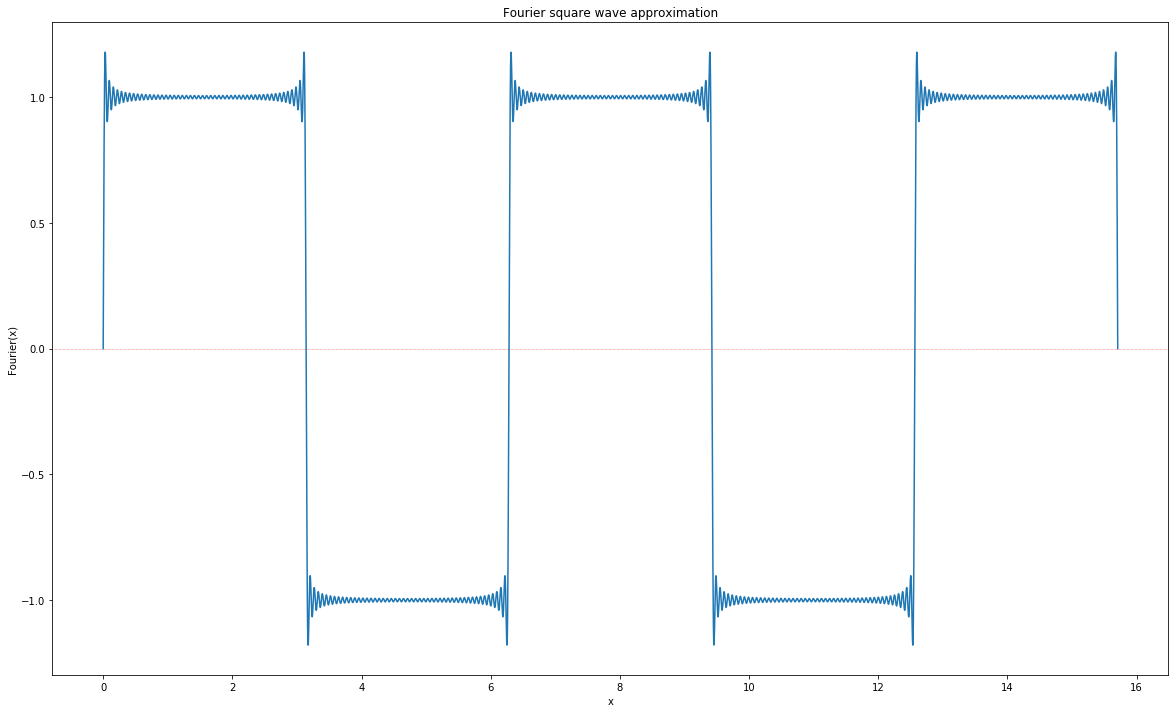

In [13]:
plot_fourier(100)

In [14]:
# generate interactive plot

fourier_sqwave_plot = interactive(plot_fourier, n_terms=(1,30,2))
display(fourier_sqwave_plot)


interactive(children=(IntSlider(value=15, description='n_terms', max=30, min=1, step=2), Output()), _dom_class…

### Choice of slider:
I have choosen intervals of 2 as the summation does not include even values of n. I have choosen 30 values as the changes are small enough to see the combination of sine waves in the plot.
